<a href="https://colab.research.google.com/github/aleksejalex/ske_assignment/blob/main/SKE_AG_protokol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importy balicku
import inspect
import numpy as np
import scipy as scp
import pandas as pd
import seaborn as sbn
import csv
import matplotlib as mpt
import statsmodels
import statsmodels.formula.api as sm
from matplotlib import pyplot as plt



def retrieve_name(var):
    "vrati nazev promenne jako string"
    callers_local_vars = inspect.currentframe().f_back.f_locals.items()
    return [var_name for var_name, var_val in callers_local_vars if var_val is var]

examplevarr = 4
print(examplevarr)
print(retrieve_name(examplevarr))

def gauss(x, mi, sigma2):
    "hustota normalniho rozdeleni. x je bud cislo nebo np.array"
    return (1/(np.sqrt(2*np.pi*sigma2)) * np.exp (-  ( (x-mi)**2 ) / (2*sigma2) ) )

4
['examplevarr']


In [2]:
# additional settings for plotting images:
plt.rcParams.update({"figure.dpi": 130})   # increase DPI, default = 96
#%config InlineBackend.figure_format = "svg"  # every plot (matplotlib's or seaborn's) must be a SVG image

In [5]:
# import datasetu (pomoci Pandas)
# (dataset stazen z >>    )
url = "https://raw.githubusercontent.com/aleksejalex/ske_assignment/main/dataset/Data%20set%20SKE_VeteranClinicTrial_modif-RC_final4_dataset_edited_for_import_to_python.csv?token=GHSAT0AAAAAABY6GWJWO6ADKPS5D4UAOH6KY7YPZGQ"
imported_data = pd.read_csv(url)

imported_data
#data.info

,treat,cell,survt,cens,KAR,didur,age,prith
0,1,1,72,0,60,7,69,0
1,1,1,411,1,70,5,64,10
2,1,1,228,1,60,3,38,0
3,1,1,126,1,60,9,63,10
4,1,1,118,1,70,11,65,10
...,...,...,...,...,...,...,...,...
132,2,4,133,0,75,1,65,0
133,2,4,111,1,60,5,64,0
134,2,4,231,1,70,18,67,10
135,2,4,378,1,80,4,65,0


In [18]:
imported_data.describe()

,treat,cell,survt,cens,KAR,didur,age,prith
count,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000
mean,1.496350,2.335766,121.627737,0.744526,58.569343,8.773723,58.306569,2.919708
std,0.501821,1.066036,157.816722,0.437728,20.039592,10.612141,10.541628,4.563375
min,1.000000,1.000000,1.000000,0.000000,10.000000,1.000000,34.000000,0.000000
25%,1.000000,1.000000,25.000000,0.000000,40.000000,3.000000,51.000000,0.000000
50%,1.000000,2.000000,80.000000,1.000000,60.000000,5.000000,62.000000,0.000000
75%,2.000000,3.000000,144.000000,1.000000,75.000000,11.000000,66.000000,10.000000
max,2.000000,4.000000,999.000000,1.000000,99.000000,87.000000,81.000000,10.000000


In [15]:
# moje data: vse, kde cell=2
data = pd.DataFrame()
data = imported_data[imported_data['cell']==2]

data.describe()

,treat,cell,survt,cens,KAR,didur,age,prith
count,48.000000,48.0,48.000000,48.000000,48.000000,48.000000,48.00000,48.000000
mean,1.375000,2.0,71.666667,0.750000,53.541667,9.250000,59.87500,2.291667
std,0.489246,0.0,85.774899,0.437595,19.101029,13.909281,9.92016,4.247444
min,1.000000,2.0,2.000000,0.000000,20.000000,1.000000,35.00000,0.000000
25%,1.000000,2.0,20.000000,0.750000,40.000000,2.000000,54.75000,0.000000
50%,1.000000,2.0,51.000000,1.000000,60.000000,4.000000,62.50000,0.000000
75%,2.000000,2.0,97.500000,1.000000,70.000000,11.000000,67.00000,0.000000
max,2.000000,2.0,392.000000,1.000000,85.000000,87.000000,72.00000,10.000000


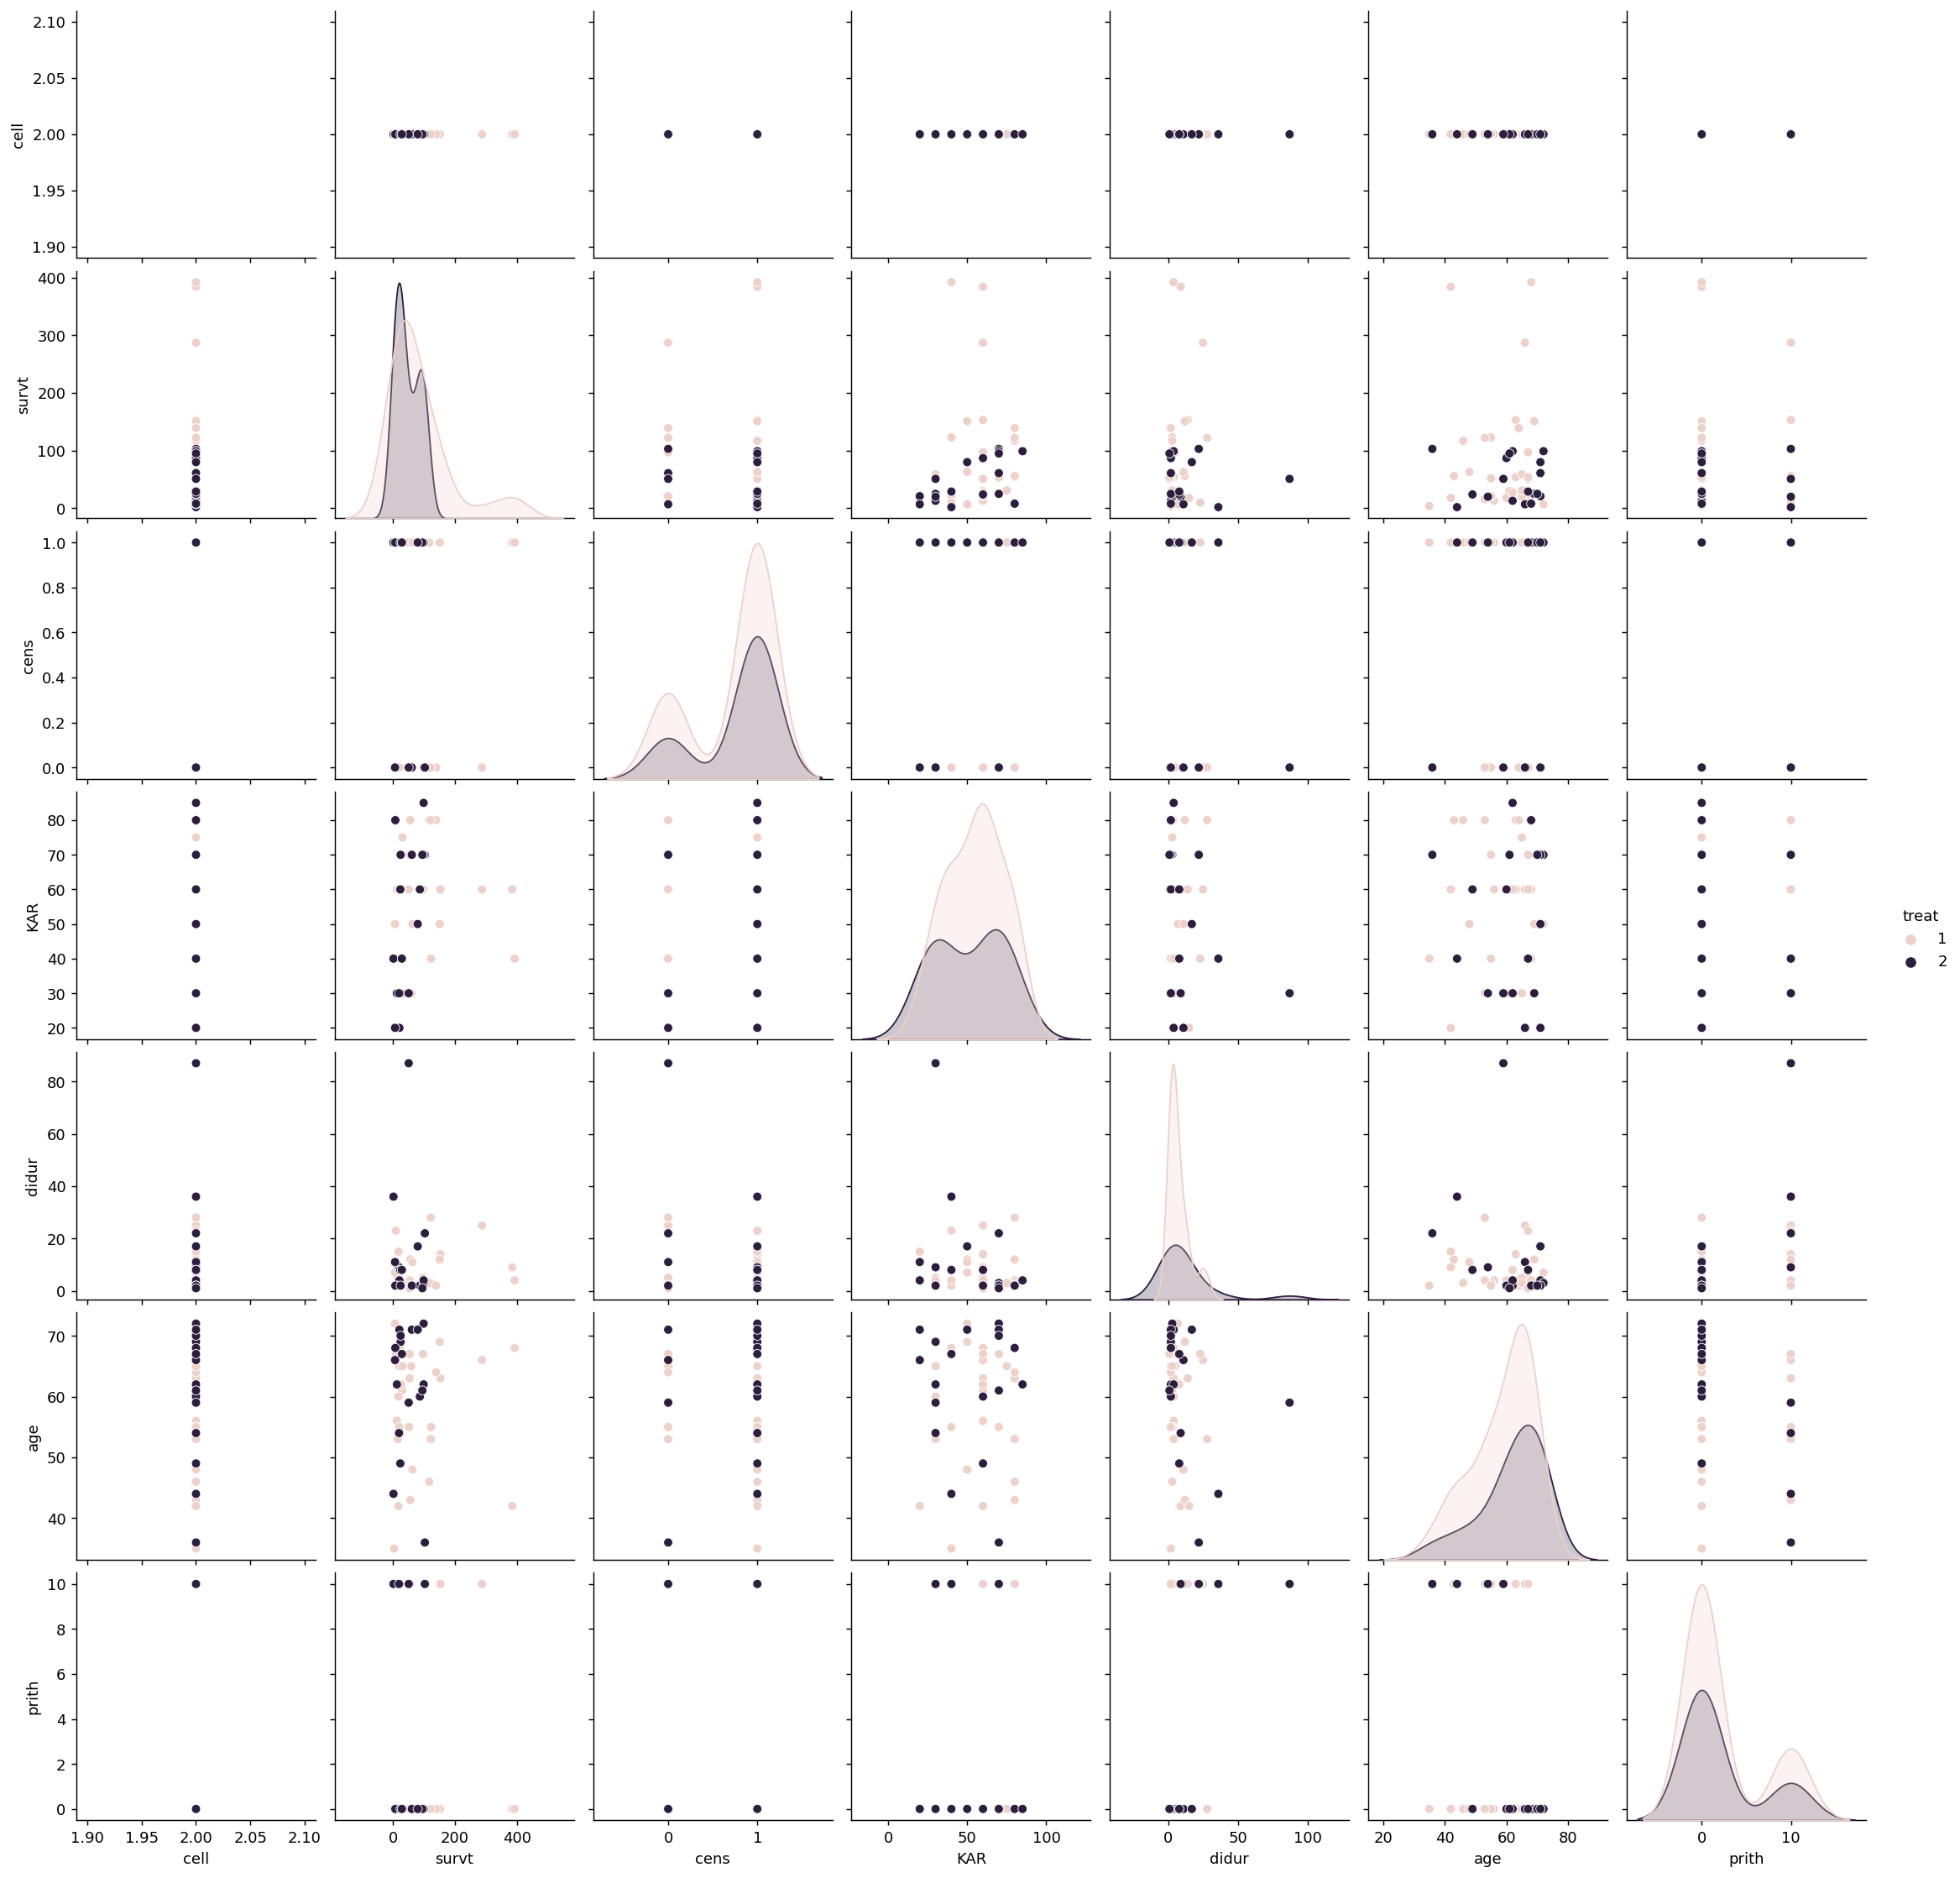

In [17]:
sbn.pairplot(data=data, hue='treat')
plt.show()